In [13]:
from purkinje.models import Purkinje
from purkinje.utils import ensure_dir
from purkinje.visualize import plot_raster, plot_avg_fr
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import numpy as np

# Simulations 1 and 3: Acquisition and Extinction

Here we acquire a single pause and allow it to extinguish. 

## Set training parameters. 

In [2]:
# Acquisition

acq_trials=400
CS_onsets=[0.0]
CS_offsets=[0.3] #[0.35]
US_onsets=[0.20] #[0.2]
US_offsets=[0.23] #[0.3]
probe_start = 50
probe_per   = 5
ITI=10
CS_freq=50
US_freq = 500
verbose=0

## Instantiate cell and train for acquisition. 

In [3]:
pk = Purkinje()
pk.run(CS_onsets=CS_onsets, CS_offsets=CS_offsets, US_onsets=US_onsets, US_offsets=US_offsets,
       ITI=ITI, CS_freq=CS_freq, US_freq=US_freq,trials=acq_trials, probe_start=probe_start, probe_per=probe_per,
      verbose=verbose)

## Extinguish by turning off US. 

In [4]:
# Extinction
ext_trials = 400
ext_US_onsets = [np.infty]
ext_US_offsets = [np.infty]

In [5]:
pk.run(CS_onsets=CS_onsets, CS_offsets=CS_offsets, US_onsets=ext_US_onsets, US_offsets=ext_US_offsets,
       ITI=ITI, CS_freq=CS_freq, US_freq=US_freq,trials=ext_trials, probe_start=probe_start, probe_per=probe_per,
      verbose=0)

## Plot

Here, we depict acquistion and extinction rasters, membrane potential after training, as well as the timecourse of archive-induced inhibition. 

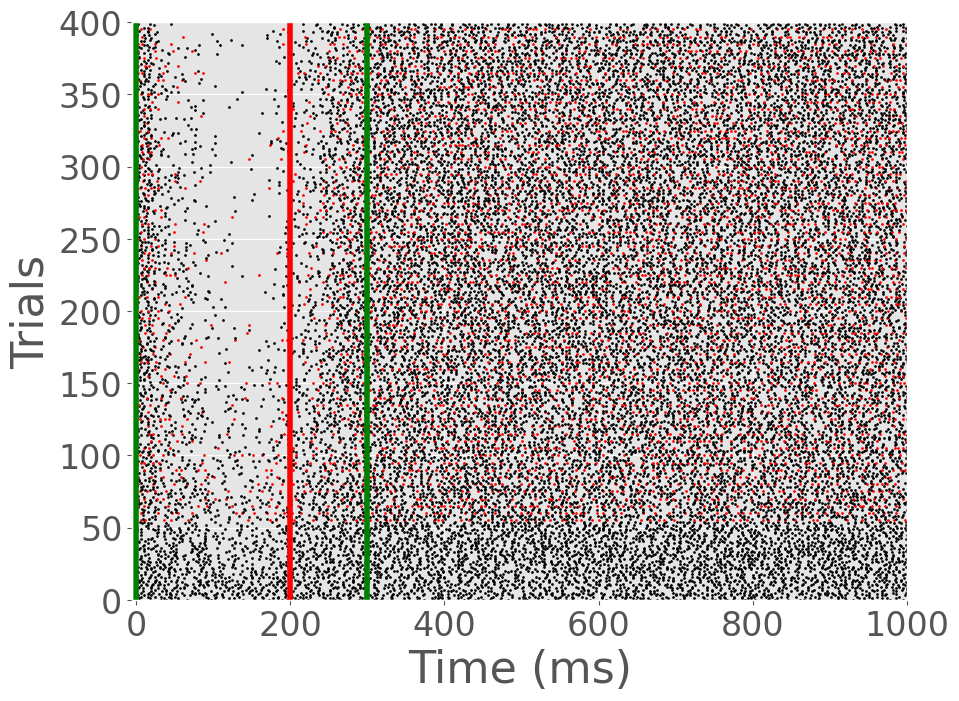

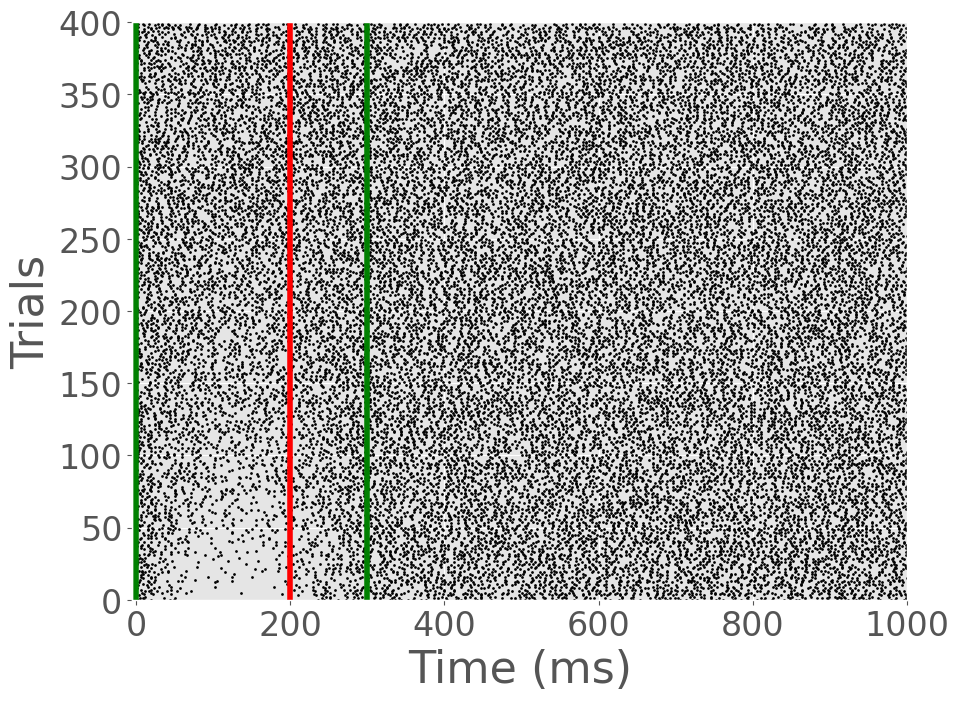

In [6]:
# Rasters

fig_save_dir = '../figures'
ensure_dir(fig_save_dir)

rasters = np.array(pk.all_rasters)
acq_rasters = rasters[:acq_trials,...]
ext_rasters = rasters[acq_trials:,...]

for rst, nm in zip([acq_rasters, ext_rasters],['acquisition', 'extinction']):
    save_path = os.path.join(fig_save_dir, nm + '.pdf')
    if nm == 'extinction':
        probe_start = np.infty
    else:
        probe_start = probe_start
    plot_raster(rst, CS_onsets, CS_offsets, US_onsets, probe_start, probe_per, save_path)

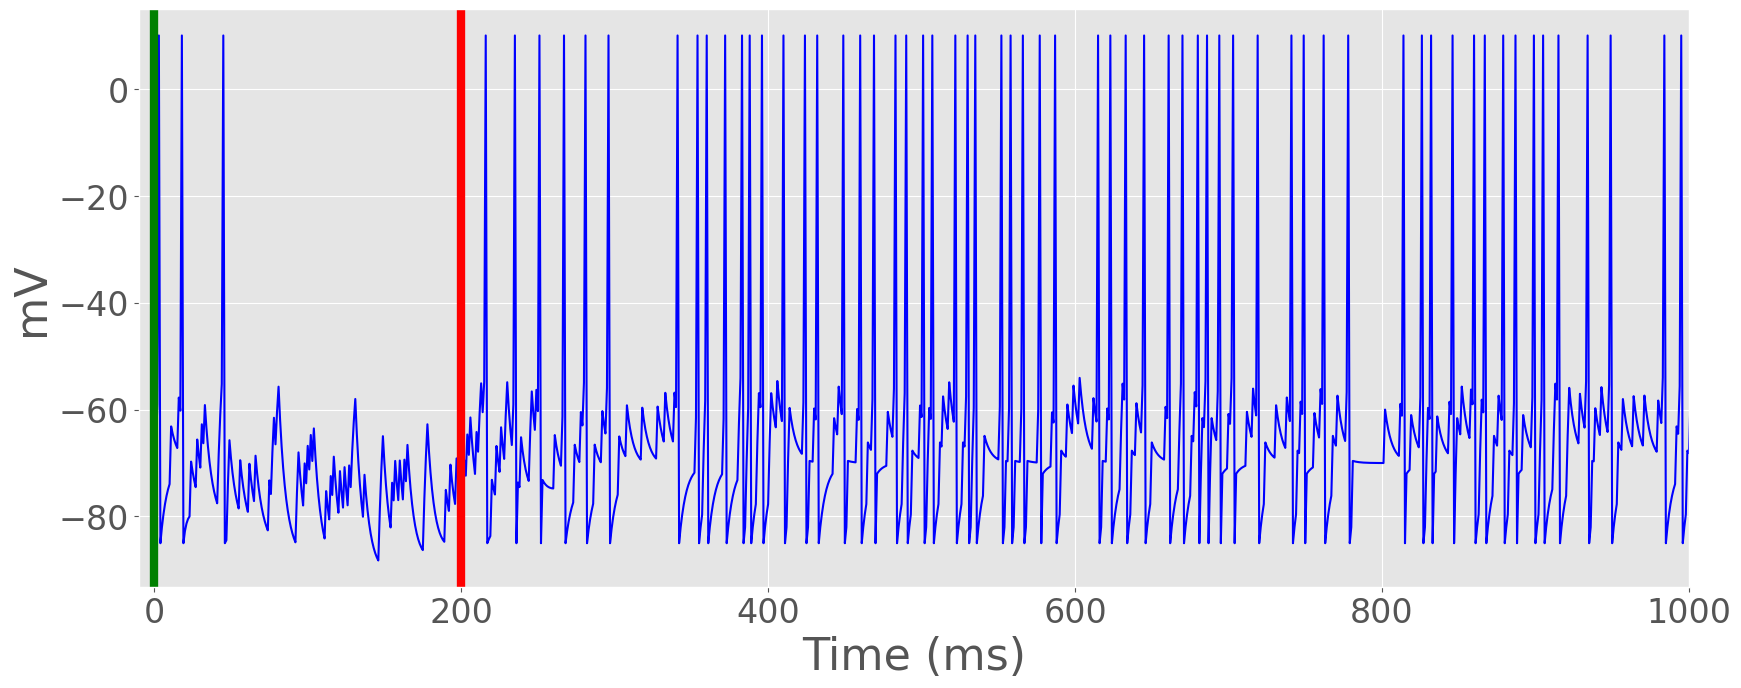

In [9]:
# Membrane potential after learning
fig, ax = plt.subplots(figsize=(20,7.5))
potential = pk.all_V[acq_trials-1]
ax.plot(potential, color='b')
for _ in range(len(CS_onsets)):
    ax.axvline(x=(CS_onsets[_] * 1000), color='g', linewidth=6)
for _ in range(len(US_onsets)):
    ax.axvline(x=(US_onsets[_] * 1000), color='r', linewidth=6)
plt.xlim([CS_onsets[0] * 1000, US_onsets[0] * 1000 + 1000])
ax.set_ylabel('mV', fontsize=32)
ax.set_xlabel('Time (ms)', fontsize=32)
ax.set_xlim([-10,1000])
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)
plt.savefig(os.path.join(fig_save_dir, 'mp_pause.pdf'))
plt.show()
plt.close()

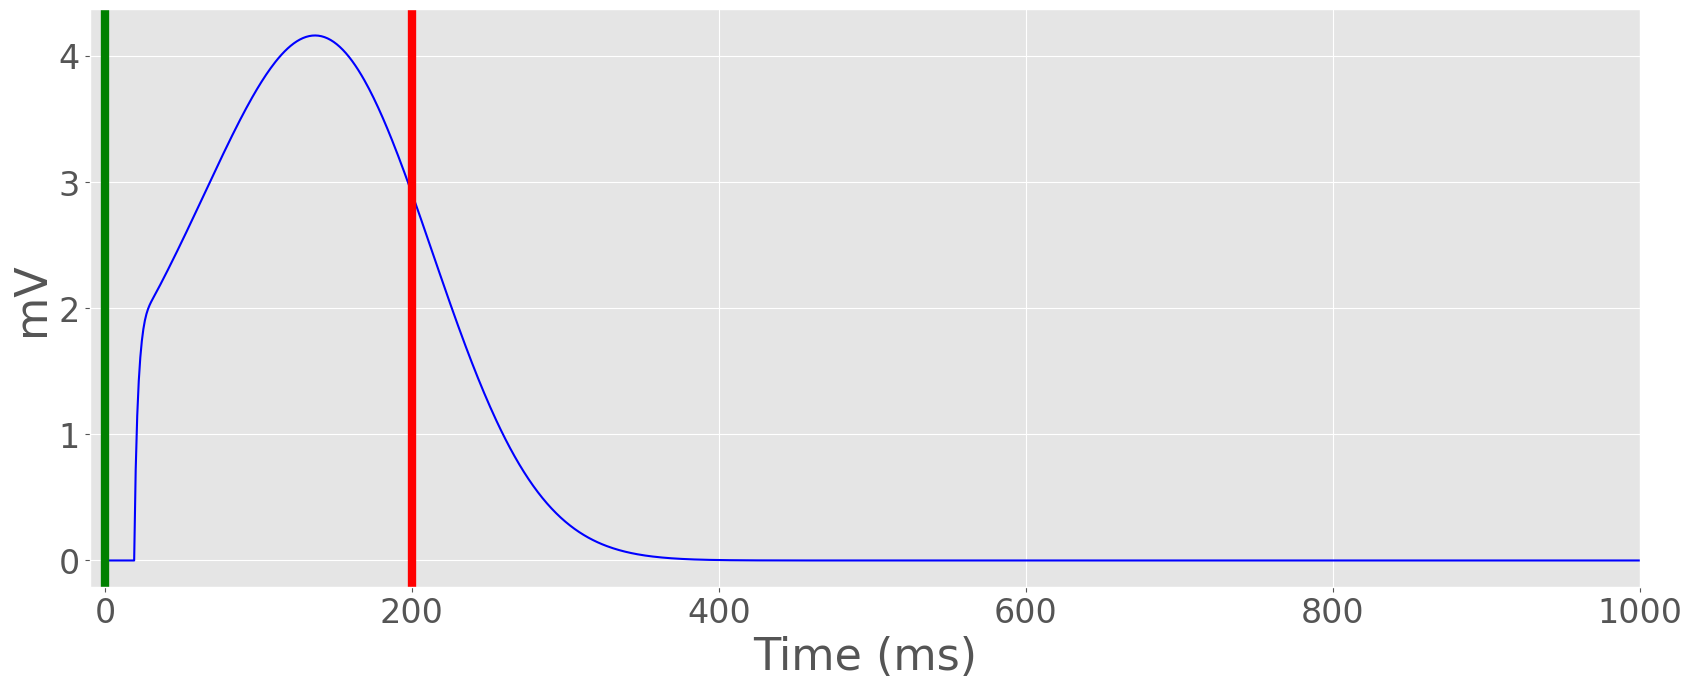

In [11]:
# I after learning
fig, ax = plt.subplots(figsize=(20,7.5))
I = pk.all_I[acq_trials - 1]
ax.plot(I, color='b')
for _ in range(len(CS_onsets)):
    ax.axvline(x=(CS_onsets[_] * 1000), color='g', linewidth=6)
for _ in range(len(US_onsets)):
    ax.axvline(x=(US_onsets[_] * 1000), color='r', linewidth=6)
plt.xlim([CS_onsets[0] * 1000, US_onsets[0] * 1000 + 1000])
ax.set_ylabel('mV', fontsize=32)
ax.set_xlabel('Time (ms)', fontsize=32)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)
ax.set_xlim([-10,1000])
plt.savefig(os.path.join(fig_save_dir, 'inhibition.pdf'))
plt.show()
plt.close()

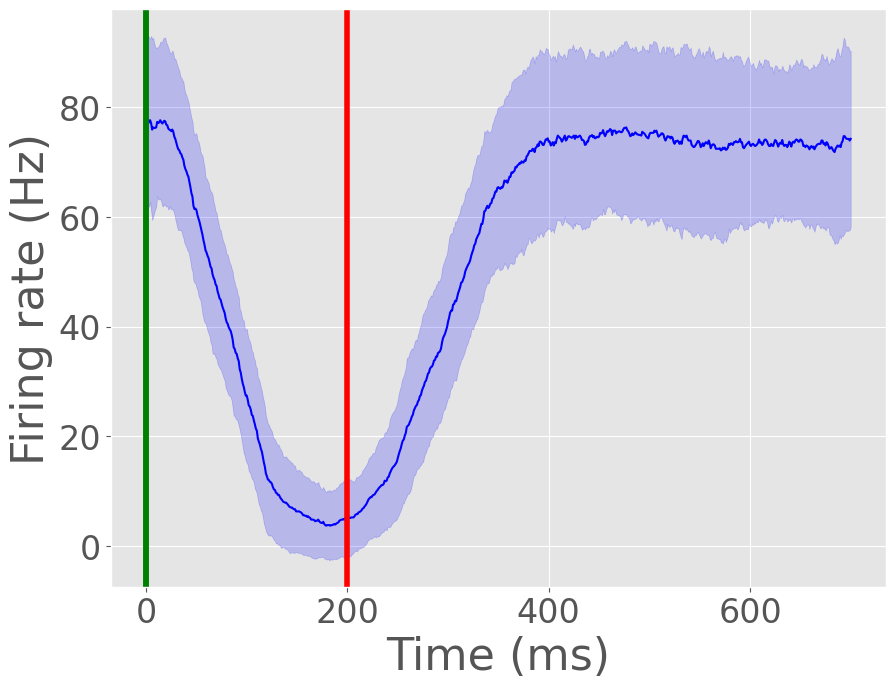

In [29]:
# Plot average firing rates
num_samples = 100
acq_potentials = np.array(pk.all_V[:acq_trials])
pre_CS_period = np.array(acq_potentials[-(num_samples + 1):-1])[:,-100:]
plot_potentials= np.concatenate((pre_CS_period,acq_potentials[-num_samples:]), axis=-1)[:,:800]
save_path = os.path.join(fig_save_dir, 'avg_fr_acq.pdf')
plot_avg_fr(plot_potentials, pk.V_spike, [0.0], CS_onsets,
            US_onsets, save_path, bin_width=100)